In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    confusion_matrix,
    classification_report,
    f1_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

## Dataset info

### Original dataset

- No. instances: 581012
- Class balances
    - 2             48.759922
    - 1             36.460521
    - 3              6.153746
    - 7              3.530048
    - 6              2.989095
    - 5              1.633873
    - 4              0.472796
- No. features: 54 features
    - Real valued features, 10
    - Categorical features, 2, but into one-hot encoded 44 features

### Processed dataset

- Procedure
    - Removed 10 features that are either highly correlated to some other
      features or with very low standard deviation
    - ["Hillshade_3pm", "Soil_Type7", "Soil_Type8", "Soil_Type14" "Soil_Type15",
    "Soil_Type21", "Soil_Type25", "Soil_Type28", "Soil_Type36", "Soil_Type37"]
    - Standard scaled the real valued features
    - Undersampled with NearMiss
- No. instances: 19229
- Train data: 13460
- Hold out test: 5769

In [2]:
# We load from pre-processed data
train_npz = np.load("/data/public/covertype/train_covertype_undersampled.npz", "r")
train_X = train_npz["X"]
train_y = train_npz["y"]

test_npz = np.load("/data/public/covertype/hold_out_test_covertype_undersampled.npz", "r")
hold_out_test_X = test_npz["X"]
hold_out_test_y = test_npz["y"]

print("Train shape: ", train_X.shape)
print("Test shape: ", hold_out_test_X.shape)


Train shape:  (13460, 44)
Test shape:  (5769, 44)


### Common code

In [3]:
# Config
NUM_FOLD = 5
RANDOM_STATE = 73

In [4]:
def get_fold_print_string(fold_result: list[float]):
    mean = np.mean(fold_result)
    ste = np.std(fold_result) / np.sqrt(NUM_FOLD)
    return f"{mean:.3f} ± {ste:.3f}"

In [5]:
def multiclass_classification(
    model,
    model_name: str,
    n_splits: int = NUM_FOLD,
    random_state: int = RANDOM_STATE,
):
    print(f"Model {model_name} with {n_splits}-fold cross-validation\n")
    skf = StratifiedKFold(
        n_splits=n_splits, shuffle=True, random_state=random_state
    )

    fold_accuracy = []
    fold_f1 = []

    hold_out_accuracy = []
    hold_out_f1 = []

    fig, ax = plt.subplots(1, 5, figsize=(15, 4))
    for i, (train_index, test_index) in enumerate(skf.split(train_X, train_y)):
        model.fit(train_X[train_index], train_y[train_index])

        y_pred = model.predict(train_X[test_index])

        acc = accuracy_score(train_y[test_index], y_pred)
        fold_accuracy.append(acc)

        f1 = f1_score(train_y[test_index], y_pred, average="weighted")
        fold_f1.append(f1)

        print(classification_report(train_y[test_index], y_pred))

        # Test on hold-out test set
        y_hold_out_pred = model.predict(hold_out_test_X)

        acc = accuracy_score(hold_out_test_y, y_hold_out_pred)
        hold_out_accuracy.append(acc)

        f1 = f1_score(hold_out_test_y, y_hold_out_pred, average="weighted")
        hold_out_f1.append(f1)

        print("Hold-out Test")
        print(classification_report(hold_out_test_y, y_hold_out_pred))

        # Plot confusion matrix
        cm = confusion_matrix(train_y[test_index], y_pred)
        disp = ConfusionMatrixDisplay(
            confusion_matrix=cm, display_labels=model.classes_
        )
        disp.plot(ax=ax[i], xticks_rotation=45)
        ax[i].set_title(f"Fold {i}")

    print("\nCross-Validation Results:")
    print(f"Mean Accuracy: {get_fold_print_string(fold_accuracy)}")
    print(f"Mean F1: {get_fold_print_string(fold_f1)}")

    print("\nHold-out Test Results:")
    print(f"Mean Accuracy: {get_fold_print_string(hold_out_accuracy)}")
    print(f"Mean F1: {get_fold_print_string(hold_out_f1)}")

    plt.tight_layout()

## Logistic regression

Model Logistic Regression with 5-fold cross-validation



/home/kg3217/miniconda3/envs/phd/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       0.80      0.80      0.80       385
           1       0.82      0.90      0.86       384
           2       0.60      0.53      0.56       385
           3       0.66      0.66      0.66       385
           4       0.80      0.81      0.81       385
           5       0.58      0.60      0.59       384
           6       1.00      1.00      1.00       384

    accuracy                           0.76      2692
   macro avg       0.75      0.76      0.75      2692
weighted avg       0.75      0.76      0.75      2692

Hold-out Test
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       824
           1       0.84      0.89      0.87       824
           2       0.58      0.51      0.54       824
           3       0.67      0.65      0.66       824
           4       0.82      0.79      0.81       824
           5       0.60      0.66      0.62       824
          

/home/kg3217/miniconda3/envs/phd/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       0.79      0.78      0.78       384
           1       0.84      0.86      0.85       384
           2       0.58      0.47      0.52       385
           3       0.65      0.71      0.68       385
           4       0.78      0.80      0.79       385
           5       0.60      0.65      0.62       385
           6       1.00      1.00      1.00       384

    accuracy                           0.75      2692
   macro avg       0.75      0.75      0.75      2692
weighted avg       0.75      0.75      0.75      2692

Hold-out Test
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       824
           1       0.84      0.89      0.87       824
           2       0.58      0.50      0.54       824
           3       0.67      0.65      0.66       824
           4       0.81      0.78      0.80       824
           5       0.60      0.67      0.63       824
          

/home/kg3217/miniconda3/envs/phd/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       0.80      0.77      0.78       384
           1       0.83      0.90      0.86       385
           2       0.58      0.48      0.52       385
           3       0.72      0.66      0.69       384
           4       0.78      0.79      0.79       384
           5       0.58      0.69      0.63       385
           6       1.00      1.00      1.00       385

    accuracy                           0.76      2692
   macro avg       0.76      0.76      0.75      2692
weighted avg       0.76      0.76      0.75      2692

Hold-out Test
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       824
           1       0.84      0.90      0.87       824
           2       0.59      0.51      0.55       824
           3       0.68      0.64      0.66       824
           4       0.82      0.79      0.80       824
           5       0.59      0.66      0.62       824
          

/home/kg3217/miniconda3/envs/phd/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       0.80      0.82      0.81       385
           1       0.86      0.87      0.86       385
           2       0.55      0.46      0.50       384
           3       0.67      0.68      0.68       384
           4       0.81      0.79      0.80       384
           5       0.59      0.67      0.63       385
           6       1.00      1.00      1.00       385

    accuracy                           0.76      2692
   macro avg       0.75      0.76      0.75      2692
weighted avg       0.75      0.76      0.75      2692

Hold-out Test
              precision    recall  f1-score   support

           0       0.79      0.83      0.80       824
           1       0.84      0.89      0.87       824
           2       0.58      0.50      0.54       824
           3       0.68      0.66      0.67       824
           4       0.82      0.77      0.79       824
           5       0.59      0.66      0.62       824
          

/home/kg3217/miniconda3/envs/phd/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       0.83      0.82      0.82       385
           1       0.83      0.89      0.86       385
           2       0.56      0.43      0.49       384
           3       0.64      0.65      0.64       385
           4       0.82      0.82      0.82       385
           5       0.58      0.67      0.62       384
           6       1.00      1.00      1.00       384

    accuracy                           0.75      2692
   macro avg       0.75      0.75      0.75      2692
weighted avg       0.75      0.75      0.75      2692

Hold-out Test
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       824
           1       0.84      0.90      0.87       824
           2       0.60      0.51      0.55       824
           3       0.68      0.65      0.66       824
           4       0.81      0.78      0.79       824
           5       0.59      0.66      0.63       824
          

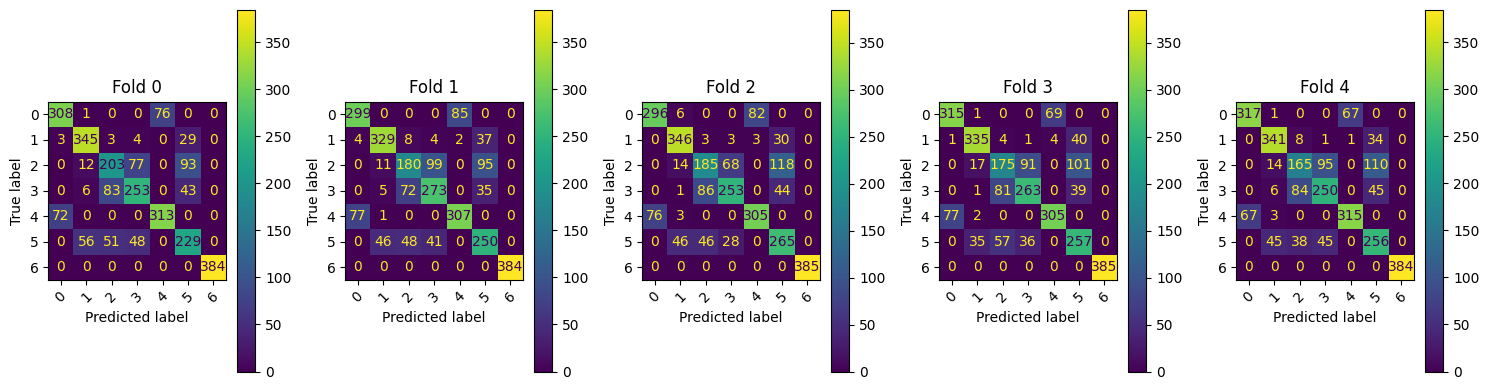

In [6]:
model = LogisticRegression(solver="saga")
multiclass_classification(model, "Logistic Regression")

## Random forest

Model Random Forest with 5-fold cross-validation

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       385
           1       0.98      0.98      0.98       384
           2       0.92      0.87      0.89       385
           3       0.90      0.91      0.91       385
           4       0.98      0.98      0.98       385
           5       0.88      0.92      0.90       384
           6       1.00      1.00      1.00       384

    accuracy                           0.95      2692
   macro avg       0.95      0.95      0.95      2692
weighted avg       0.95      0.95      0.95      2692

Hold-out Test
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       824
           1       0.98      0.97      0.98       824
           2       0.90      0.84      0.87       824
           3       0.89      0.90      0.90       824
           4       0.97      0.98      0.98       824
           5  

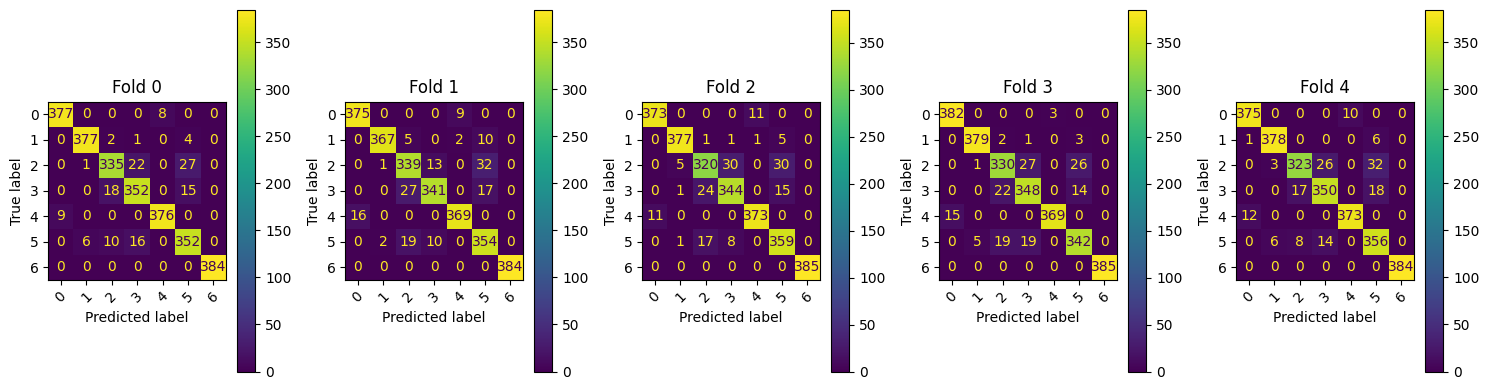

In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=75)
multiclass_classification(model, "Random Forest")

## SVM

Model SVM with 5-fold cross-validation

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       385
           1       0.66      0.82      0.73       384
           2       0.55      0.37      0.44       385
           3       0.61      0.65      0.63       385
           4       0.83      0.79      0.81       385
           5       0.59      0.62      0.60       384
           6       1.00      1.00      1.00       384

    accuracy                           0.72      2692
   macro avg       0.72      0.72      0.71      2692
weighted avg       0.72      0.72      0.71      2692

Hold-out Test
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       824
           1       0.69      0.82      0.75       824
           2       0.57      0.37      0.44       824
           3       0.61      0.67      0.64       824
           4       0.81      0.78      0.80       824
           5       0.58 

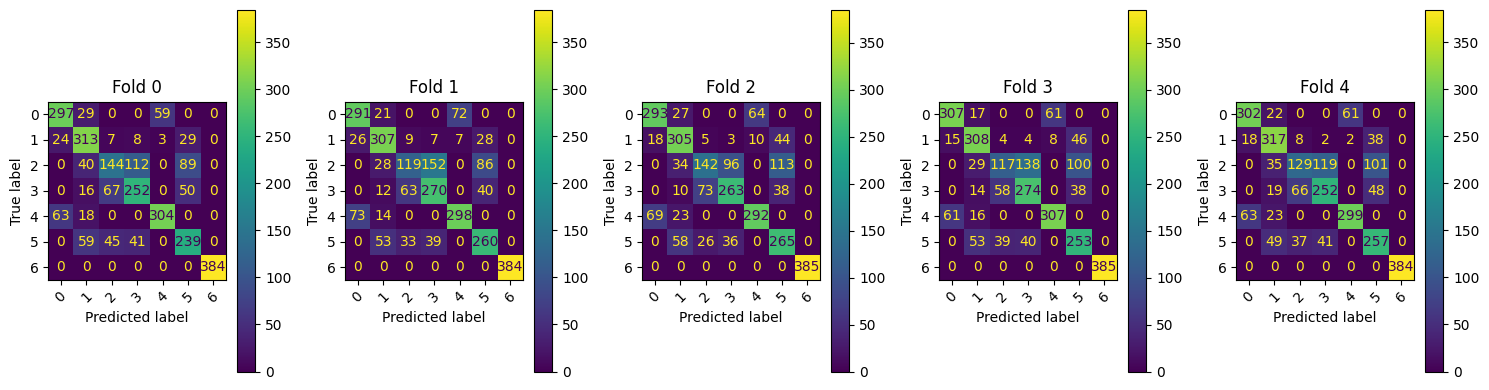

In [8]:
model = LinearSVC(random_state=76, class_weight="balanced")
multiclass_classification(model, "SVM")

## Decision tree

In [9]:
# Function to calculate the average depth of the decision tree
def average_tree_depth(tree):
    def _recursive_depth(node, current_depth, depths):
        if (
            tree.children_left[node] == tree.children_right[node]
        ):  # It's a leaf node
            depths.append(current_depth)
            return
        _recursive_depth(tree.children_left[node], current_depth + 1, depths)
        _recursive_depth(tree.children_right[node], current_depth + 1, depths)

    depths = []
    _recursive_depth(0, 0, depths)  # Start from the root node (index 0)
    return sum(depths) / len(depths)


# Function to count the number of branches (internal nodes)
def count_branches(tree):
    n_nodes = tree.node_count  # Total number of nodes in the tree
    n_leaves = tree.n_leaves  # Total number of leaf nodes
    n_branches = n_nodes - n_leaves  # Number of internal nodes (branches)
    return n_branches

Decision tree with 5-fold cross-validation

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       385
           1       0.97      0.97      0.97       384
           2       0.84      0.84      0.84       385
           3       0.85      0.86      0.86       385
           4       0.93      0.96      0.94       385
           5       0.86      0.84      0.85       384
           6       1.00      1.00      1.00       384

    accuracy                           0.92      2692
   macro avg       0.92      0.92      0.92      2692
weighted avg       0.92      0.92      0.92      2692

Hold-out Test
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       824
           1       0.96      0.96      0.96       824
           2       0.82      0.84      0.83       824
           3       0.88      0.85      0.86       824
           4       0.95      0.95      0.95       824
           5       0

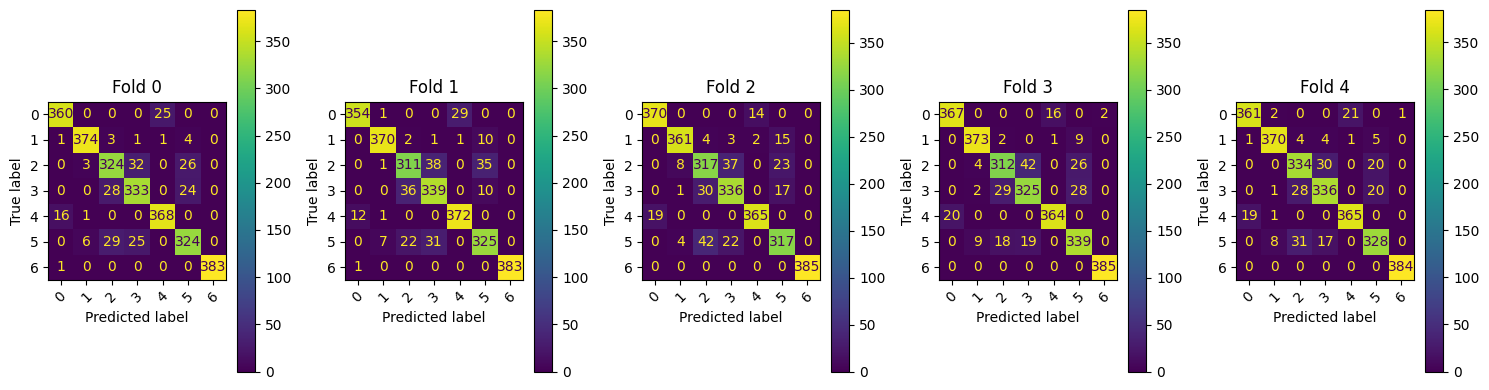

In [10]:
model = DecisionTreeClassifier(random_state=77, class_weight="balanced")
print(f"Decision tree with {NUM_FOLD}-fold cross-validation\n")
skf = StratifiedKFold(n_splits=NUM_FOLD, shuffle=True, random_state=77)

fold_accuracy = []
fold_f1 = []
tree_stats: list[dict[str, float]] = []
hold_out_accuracy = []
hold_out_f1 = []

fig, ax = plt.subplots(1, NUM_FOLD, figsize=(15, 4))
for i, (train_index, test_index) in enumerate(skf.split(train_X, train_y)):
    model.fit(train_X[train_index], train_y[train_index])

    y_pred = model.predict(train_X[test_index])

    acc = accuracy_score(train_y[test_index], y_pred)
    fold_accuracy.append(acc)

    f1 = f1_score(train_y[test_index], y_pred, average="weighted")
    fold_f1.append(f1)

    max_depth = model.get_depth()
    avg_depth = average_tree_depth(model.tree_)
    n_branches = count_branches(model.tree_)

    tree_stats.append(
        {
            "max_depth": max_depth,
            "avg_depth": avg_depth,
            "n_branches": n_branches,
        }
    )

    print(classification_report(train_y[test_index], y_pred))

    # Test on hold-out test set
    y_hold_out_pred = model.predict(hold_out_test_X)

    acc = accuracy_score(hold_out_test_y, y_hold_out_pred)
    hold_out_accuracy.append(acc)
    f1 = f1_score(hold_out_test_y, y_hold_out_pred, average="weighted")
    hold_out_f1.append(f1)
    print("Hold-out Test")
    print(classification_report(hold_out_test_y, y_hold_out_pred))

    # Plot confusion matrix
    cm = confusion_matrix(train_y[test_index], y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=model.classes_
    )
    disp.plot(ax=ax[i], xticks_rotation=45)
    ax[i].set_title(f"Fold {i}")

print("\nCross-Validation Results:")
print(f"Mean Accuracy: {get_fold_print_string(fold_accuracy)}")
print(f"Mean F1: {get_fold_print_string(fold_f1)}")

print("\nHold-out Test Results:")
print(f"Mean Accuracy: {get_fold_print_string(hold_out_accuracy)}")
print(f"Mean F1: {get_fold_print_string(hold_out_f1)}")

print(f"\nTree stats:")
print(
    f"Avg Max Depth: {get_fold_print_string([x['max_depth'] for x in tree_stats])}"
)
print(
    f"Avg Avg Depth: {get_fold_print_string([x['avg_depth'] for x in tree_stats])}"
)
print(
    f"Avg Branches: {get_fold_print_string([x['n_branches'] for x in tree_stats])}"
)

plt.tight_layout()